In [1]:
!pip install -q darts

     |████████████████████████████████| 290 kB 5.4 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 9.8 MB 39.4 MB/s 
     |████████████████████████████████| 791 kB 49.5 MB/s 
     |████████████████████████████████| 1.4 MB 51.1 MB/s 
     |████████████████████████████████| 11.2 MB 51.2 MB/s 
     |████████████████████████████████| 177 kB 44.7 MB/s 
     |████████████████████████████████| 155 kB 52.8 MB/s 
     |████████████████████████████████| 374 kB 73.6 MB/s 
     |████████████████████████████████| 884 kB 48.6 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 216 kB 68.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.14.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/retail_sales.csv')

In [6]:
series = TimeSeries.from_dataframe(df,'ds','y')

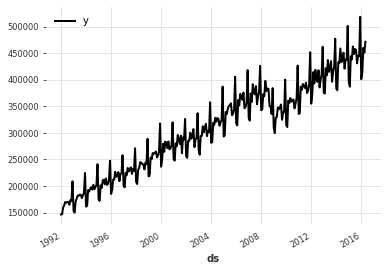

In [7]:
series.plot()

In [12]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20140101'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [13]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=12,
    force_reset=True
)

In [14]:
my_model.fit(train_transformed,
             verbose=True)

[2021-12-10 05:39:18,744] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 245 samples.
[2021-12-10 05:39:18,744] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 245 samples.
[2021-12-10 05:39:18,752] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-10 05:39:18,752] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  0%|          | 2/500 [00:00<01:20,  6.15it/s]

  2%|▏         | 12/500 [00:01<01:19,  6.14it/s]

  4%|▍         | 22/500 [00:03<01:15,  6.35it/s]

  6%|▋         | 32/500 [00:05<01:17,  6.02it/s]

  8%|▊         | 42/500 [00:06<01:14,  6.15it/s]

 10%|█         | 52/500 [00:08<01:13,  6.10it/s]

 12%|█▏        | 62/500 [00:10<01:12,  6.02it/s]

 14%|█▍        | 72/500 [00:11<01:09,  6.20it/s]

 16%|█▋        | 82/500 [00:13<01:06,  6.25it/s]

 18%|█▊        | 92/500 [00:14<01:05,  6.28it/s]

 20%|██        | 102/500 [00:16<01:03,  6.23it/s]

 22%|██▏       | 112/500 [00:18<01:02,  6.23it/s]

 24%|██▍       | 122/500 [00:19<01:01,  6.19it/s]

 26%|██▋       | 132/500 [00:21<00:57,  6.37it/s]

 28%|██▊       | 142/500 [00:22<00:56,  6.33it/s]

 30%|███       | 152/500 [00:24<00:57,  6.08it/s]

 32%|███▏      | 162/500 [00:26<00:55,  6.14it/s]

 34%|███▍      | 172/500 [00:27<00:52,  6.31it/s]

 36%|███▋      | 182/500 [00:29<00:51,  6.23it/s]

 38%|███▊      | 192/500 [00:30<00:48,  6.38it/s]

 40%|████      | 202/500 [00:32<00:48,  6.16it/s]

 42%|████▏     | 212/500 [00:34<00:45,  6.31it/s]

 44%|████▍     | 222/500 [00:35<00:44,  6.26it/s]

 46%|████▋     | 232/500 [00:37<00:42,  6.32it/s]

 48%|████▊     | 242/500 [00:38<00:40,  6.33it/s]

 50%|█████     | 252/500 [00:40<00:40,  6.17it/s]

 52%|█████▏    | 262/500 [00:42<00:37,  6.34it/s]

 54%|█████▍    | 272/500 [00:43<00:37,  6.07it/s]

 56%|█████▋    | 282/500 [00:45<00:35,  6.21it/s]

 58%|█████▊    | 292/500 [00:47<00:32,  6.32it/s]

 60%|██████    | 302/500 [00:48<00:31,  6.27it/s]

 62%|██████▏   | 312/500 [00:50<00:32,  5.76it/s]

 64%|██████▍   | 322/500 [00:51<00:29,  5.99it/s]

 66%|██████▋   | 332/500 [00:53<00:27,  6.07it/s]

 68%|██████▊   | 342/500 [00:55<00:25,  6.20it/s]

 70%|███████   | 352/500 [00:56<00:23,  6.24it/s]

 72%|███████▏  | 362/500 [00:58<00:21,  6.30it/s]

 74%|███████▍  | 372/500 [00:59<00:20,  6.33it/s]

 76%|███████▋  | 382/500 [01:01<00:18,  6.25it/s]

 78%|███████▊  | 392/500 [01:03<00:17,  6.20it/s]

 80%|████████  | 402/500 [01:04<00:16,  6.08it/s]

 82%|████████▏ | 412/500 [01:06<00:14,  6.23it/s]

 84%|████████▍ | 422/500 [01:08<00:12,  6.20it/s]

 86%|████████▋ | 432/500 [01:09<00:10,  6.19it/s]

 88%|████████▊ | 442/500 [01:11<00:09,  6.22it/s]

 90%|█████████ | 452/500 [01:12<00:07,  6.33it/s]

 92%|█████████▏| 462/500 [01:14<00:05,  6.37it/s]

 94%|█████████▍| 472/500 [01:16<00:04,  6.37it/s]

 96%|█████████▋| 482/500 [01:17<00:02,  6.37it/s]

 98%|█████████▊| 492/500 [01:19<00:01,  6.32it/s]

100%|██████████| 500/500 [01:20<00:00,  6.21it/s]


In [15]:
predicted = my_model.predict(n=len(val_transformed))

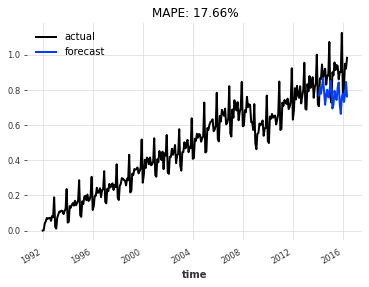

In [16]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()